In [23]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from math import *
from datetime import datetime


In [24]:

df_turbo = pd.read_csv('results_turbospectrum_1.txt', delimiter='\t')
df_synthe = pd.read_csv('results_synthe_1.txt', delimiter='\t')
df_moog = pd.read_csv('results_moog_1.txt', delimiter='\t')


In [37]:
stars = []
vsini_lit = []
vsini_lit_err_up = []
vsini_lit_err_down = []

vsini_turbo_1 = []
vsini_err_turbo_1 = []

vsini_synthe_1 = []
vsini_err_synthe_1 = []

vsini_moog_1 = []
vsini_err_moog_1 = []


for i, star in enumerate(df_turbo['Star']):
    stars.append(star)
    vsini_lit.append(df_turbo['vsini'][i])
    vsini_lit_err_up.append(df_turbo['err_up_vsini'][i])
    vsini_lit_err_down.append(df_turbo['err_down_vsini'][i])
    
    vsini_turbo_1_value = df_turbo['ispec_vsini'][i]
    vsini_turbo_1.append(vsini_turbo_1_value)
    sigma_vsini_turbo_1 = df_turbo['ispec_vsini_err'][i]
    vsini_err_turbo_1.append(sigma_vsini_turbo_1)
    
    vsini_synthe_1_value = df_synthe['ispec_vsini'][i]
    vsini_synthe_1.append(vsini_synthe_1_value)
    sigma_vsini_synthe_1 = df_synthe['ispec_vsini_err'][i]
    vsini_err_synthe_1.append(sigma_vsini_synthe_1)
    
    vsini_moog_1_value = df_moog['ispec_vsini'][i]
    vsini_moog_1.append(vsini_moog_1_value)
    sigma_vsini_moog_1 = df_moog['ispec_vsini_err'][i]
    vsini_err_moog_1.append(sigma_vsini_moog_1)


In [39]:
stars = np.array(stars)
vsini_lit = np.array(vsini_lit)
vsini_lit_err_up = np.array(vsini_lit_err_up)
vsini_lit_err_down = np.array(vsini_lit_err_down)

vsini_turbo_1 = np.array(vsini_turbo_1)
vsini_err_turbo_1 = np.array(vsini_err_turbo_1)

vsini_synthe_1 = np.array(vsini_synthe_1)
vsini_err_synthe_1 = np.array(vsini_err_synthe_1)

vsini_moog_1 = np.array(vsini_moog_1)
vsini_err_moog_1 = np.array(vsini_err_moog_1)

In [55]:
vsini_diff_turbo_1 = vsini_lit - vsini_turbo_1
vsini_diff_sigma_up_turbo = np.sqrt(vsini_lit_err_up**2 + vsini_err_turbo_1**2)
vsini_diff_sigma_down_turbo = np.sqrt(vsini_lit_err_down**2 + vsini_err_turbo_1**2)

vsini_diff_synthe_1 = vsini_lit - vsini_synthe_1
vsini_diff_sigma_up_synthe = np.sqrt(vsini_lit_err_up**2 + vsini_err_synthe_1**2)
vsini_diff_sigma_down_synthe = np.sqrt(vsini_lit_err_down**2 + vsini_err_synthe_1**2)

vsini_diff_moog_1 = vsini_lit - vsini_moog_1
vsini_diff_sigma_up_moog = np.sqrt(vsini_lit_err_up**2 + vsini_err_moog_1**2)
vsini_diff_sigma_down_moog = np.sqrt(vsini_lit_err_down**2 + vsini_err_moog_1**2)

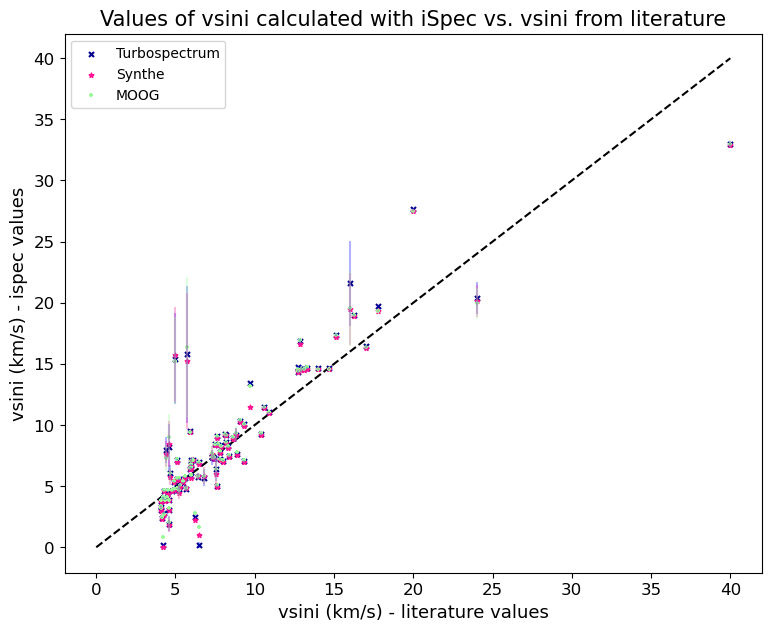

In [54]:
plt.figure(figsize=(9,7))
plt.plot([0,40],[0,40], 'k--', zorder=0)
plt.scatter(vsini_lit, vsini_turbo_1, marker='x', color='darkblue', s=13, zorder=5, label='Turbospectrum') 
plt.scatter(vsini_lit, vsini_synthe_1, marker='*', color='deeppink', s=12, zorder=5, label='Synthe') 
plt.scatter(vsini_lit, vsini_moog_1, marker='+',color='palegreen', s=9, zorder=5, label='MOOG') 
bar = np.array([-vsini_lit_err_down , vsini_lit_err_up], dtype=float)
#plt.errorbar(vsini_lit, vsini_turbo_1, xerr=bar, fmt='none', ecolor='blue', alpha=0.3,zorder=10)
plt.errorbar(vsini_lit, vsini_turbo_1, yerr=vsini_err_turbo_1, fmt='none', ecolor='blue', alpha=0.3,zorder=10)
plt.errorbar(vsini_lit, vsini_synthe_1, yerr=vsini_err_synthe_1, fmt='none', ecolor='deeppink', alpha=0.3,zorder=10)
plt.errorbar(vsini_lit, vsini_moog_1, yerr=vsini_err_moog_1, fmt='none', ecolor='palegreen', alpha=0.3,zorder=10)
plt.xlabel('vsini (km/s) - literature values', size=13)
plt.ylabel('vsini (km/s) - ispec values', size=13)
plt.xticks(size=12)    
plt.yticks(size=12)
plt.title('Values of vsini calculated with iSpec vs. vsini from literature', size=15)
plt.legend()
plt.show()

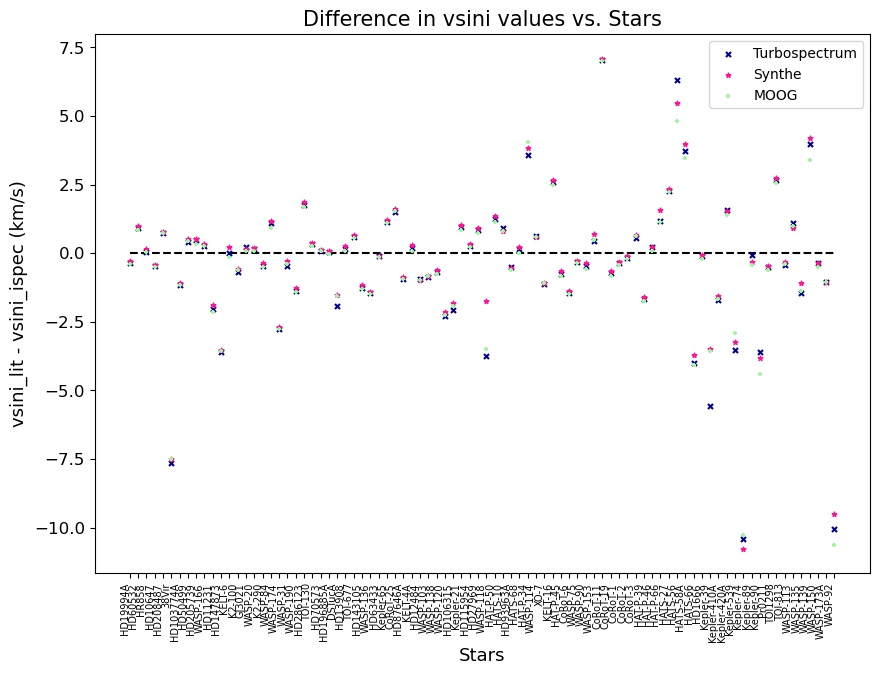

In [58]:
plt.figure(figsize=(10,7))
plt.scatter(stars, vsini_diff_turbo_1, marker='x', color='darkblue', s=13, zorder=5, label='Turbospectrum') 
plt.scatter(stars, vsini_diff_synthe_1, marker='*', color='deeppink', s=12, zorder=5, label='Synthe') 
plt.scatter(stars, vsini_diff_moog_1, marker='+',color='palegreen', s=9, zorder=5, label='MOOG') 
plt.plot(stars, np.zeros(len(stars), dtype=float), '--', color='black', zorder=0)                      
plt.xlabel('Stars', size=13)
plt.ylabel('vsini_lit - vsini_ispec (km/s)', size=13)
plt.title('Difference in vsini values vs. Stars', size=15)
plt.xticks(rotation=90, ha='right', size=7)    
plt.yticks(size=12)
plt.legend()
plt.show() 